### Limpieza de Datos


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1304 non-null   int64         
 1   date                  1304 non-null   datetime64[ns]
 2   year                  1304 non-null   int64         
 3   source_database       1304 non-null   object        
 4   origin                178 non-null    object        
 5   attack_vector         165 non-null    object        
 6   attack_description    1304 non-null   object        
 7   country               1304 non-null   object        
 8   industry_type         1304 non-null   object        
 9   subcategory           1304 non-null   object        
 10  attack_details        1304 non-null   object        
 11  ti_safe_score         638 non-null    float64       
 12  impact                724 non-null    object   

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_16464\2282876630.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


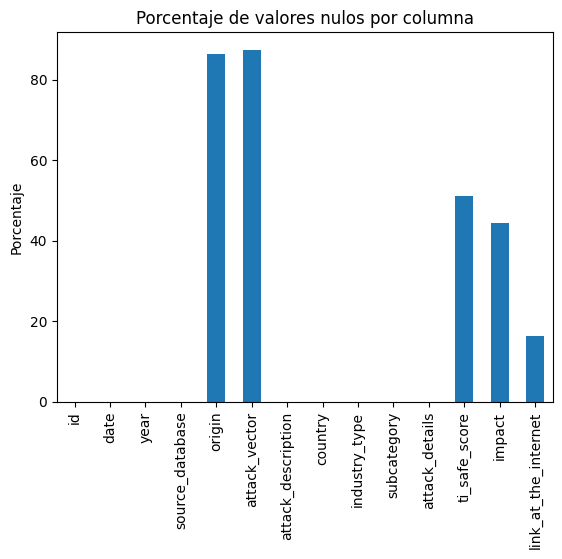

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = './data/TISAFE.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta especificada: {file_path}")
    exit()

# Limpieza de datos
df.drop_duplicates(inplace=True)  # Eliminar duplicados
df.dropna(subset=['attack_description', 'country', 'industry_type', 'attack_details'], inplace=True)

# Normalizar columna industry_type
df['industry_type'] = df['industry_type'].str.strip().str.lower().replace({
    'gpver,emt': 'government',
})

# Convertir columna date a formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

# Información del dataset
print("\nInformación general del dataset:")
df.info()

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nPorcentaje de valores nulos por columna:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# Visualizar porcentaje de nulos
missing_percentage.plot(kind='bar', title='Porcentaje de valores nulos por columna')
plt.ylabel('Porcentaje')
plt.show()


### Análisis Exploratorio

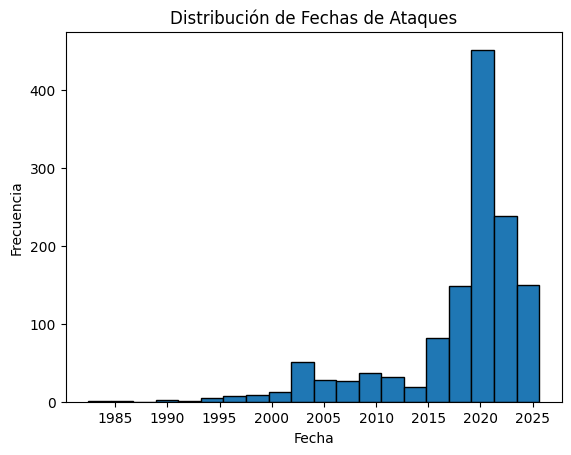


Frecuencia de ataques por país (Top 10):
country
United States     672
Brazil             89
Canada             46
England            45
Global             39
Australia          29
Germany            25
France             21
Europe             19
United Kingdom     19
Name: count, dtype: int64


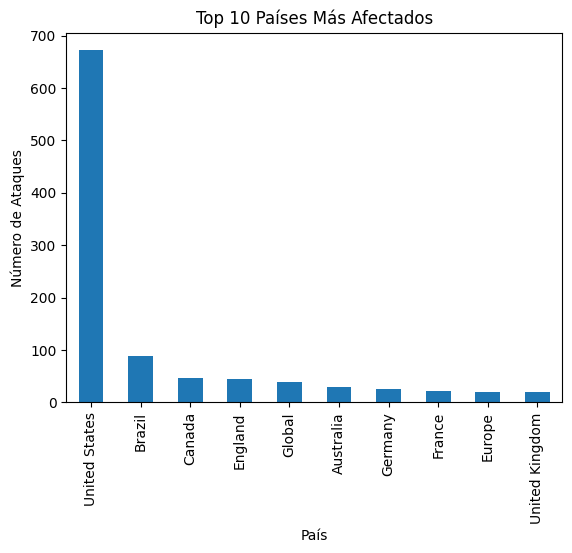


Frecuencia de ataques por industria (Top 10):
industry_type
government facilities sector                   280
transport sector and systems                   114
energy sector                                  101
communication and telecommunications sector     85
manufacturing and automation sector             79
information technology sector                   75
government facilities                           73
water and wastewater sector and systems         56
hospital and health sector                      52
banking and finance sector                      48
Name: count, dtype: int64


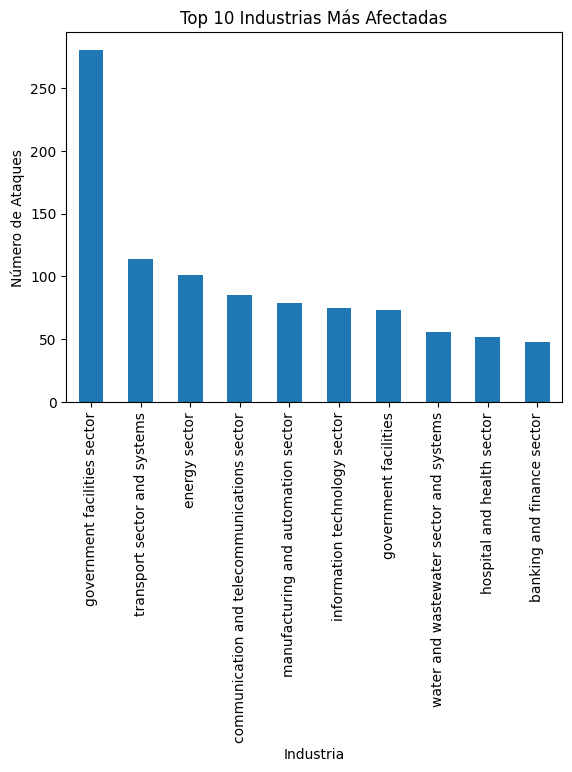

In [17]:
import matplotlib.pyplot as plt

# Distribución de fechas
plt.hist(df['date'], bins=20, edgecolor='k')
plt.title('Distribución de Fechas de Ataques')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.show()

# Frecuencia de ataques por país
country_counts = df['country'].value_counts()
print("\nFrecuencia de ataques por país (Top 10):")
print(country_counts.head(10))
country_counts.head(10).plot(kind='bar', title='Top 10 Países Más Afectados')
plt.xlabel('País')
plt.ylabel('Número de Ataques')
plt.show()

# Frecuencia de ataques por industria
industry_counts = df['industry_type'].value_counts()
print("\nFrecuencia de ataques por industria (Top 10):")
print(industry_counts.head(10))
industry_counts.head(10).plot(kind='bar', title='Top 10 Industrias Más Afectadas')
plt.xlabel('Industria')
plt.ylabel('Número de Ataques')
plt.show()


### Análisis Descriptivo


Estadísticas descriptivas:
                id                           date         year  ti_safe_score
count  1304.000000                           1304  1304.000000     638.000000
mean    655.919479  2017-12-07 05:58:53.742331392  2017.536043       3.575235
min       1.000000            1982-06-01 00:00:00  1982.000000       0.000000
25%     328.750000            2017-01-31 18:00:00  2017.000000       3.000000
50%     654.500000            2020-01-22 12:00:00  2020.000000       4.000000
75%     981.250000            2021-11-23 00:00:00  2021.000000       4.000000
max    1338.000000            2025-08-15 00:00:00  2024.000000       5.000000
std     379.586674                            NaN     6.287210       0.944195


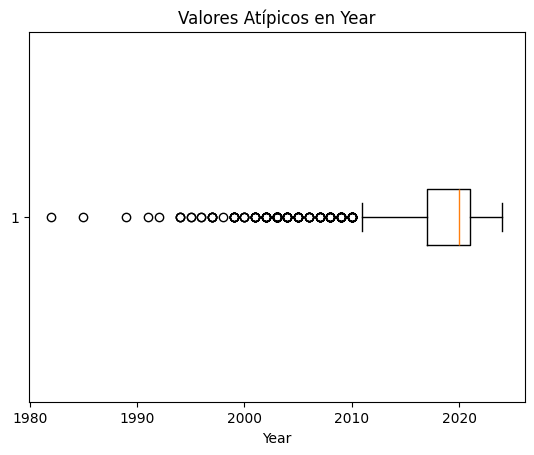


Tabla cruzada entre country e industry_type:
industry_type              activism  aerospace  agricultural sector  \
country                                                               
\r\nUkraine                       0          0                    0   
Andorra                           0          0                    0   
Arab Emirates                     0          0                    0   
Argentina                         0          0                    0   
Asia                              0          0                    0   
Asia and United States            0          0                    0   
Australia                         0          0                    1   
Australia                         0          0                    0   
Australia and New Zealand         0          0                    0   
Austria                           0          0                    0   

industry_type              agriculture, food and beverage  apps  automotive  \
country               

) missing from font(s) DejaVu Sans.ming\Python\Python312\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.ming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


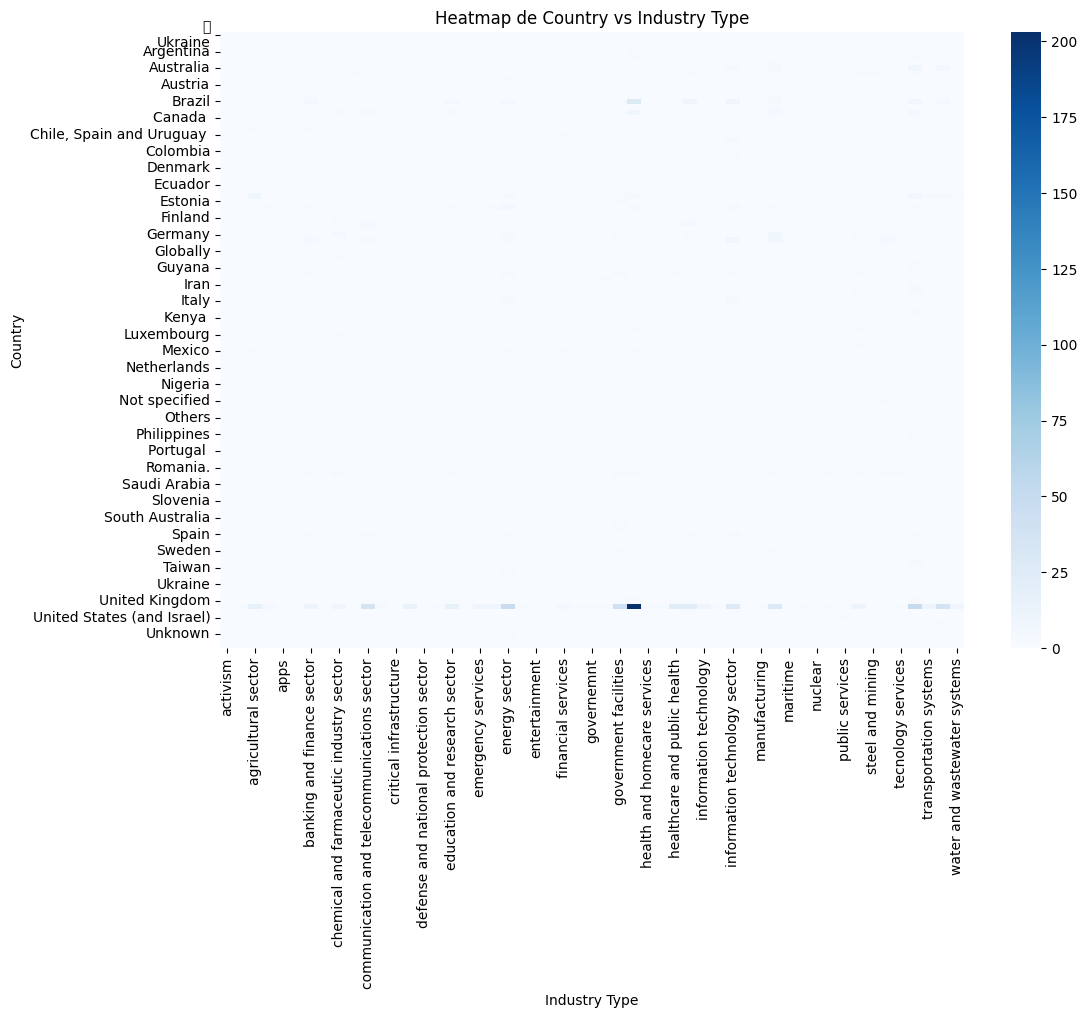

In [18]:
import seaborn as sns

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Detección de valores atípicos en 'year' (si está disponible)
if 'year' in df.columns:
    plt.boxplot(df['year'].dropna(), vert=False)
    plt.title('Valores Atípicos en Year')
    plt.xlabel('Year')
    plt.show()

# Análisis cruzado entre 'country' e 'industry_type'
cross_tab = pd.crosstab(df['country'], df['industry_type'])
print("\nTabla cruzada entre country e industry_type:")
print(cross_tab.head(10))

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='Blues', cbar=True)
plt.title('Heatmap de Country vs Industry Type')
plt.xlabel('Industry Type')
plt.ylabel('Country')
plt.show()


### Clustering K-Means

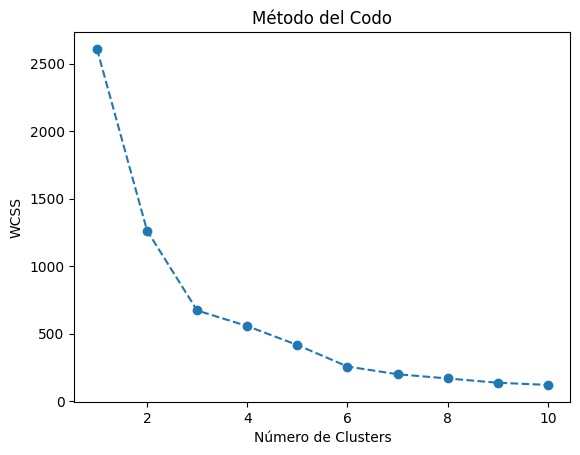

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificar variables categóricas relevantes
label_encoder = LabelEncoder()
df['subcategory_encoded'] = label_encoder.fit_transform(df['subcategory'])
df['industry_type_encoded'] = label_encoder.fit_transform(df['industry_type'])

# Selección de variables para clustering
numeric_features = ['industry_type_encoded', 'subcategory_encoded']
data_numeric = df[numeric_features].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Método del codo
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


### Clustering Jerárquico

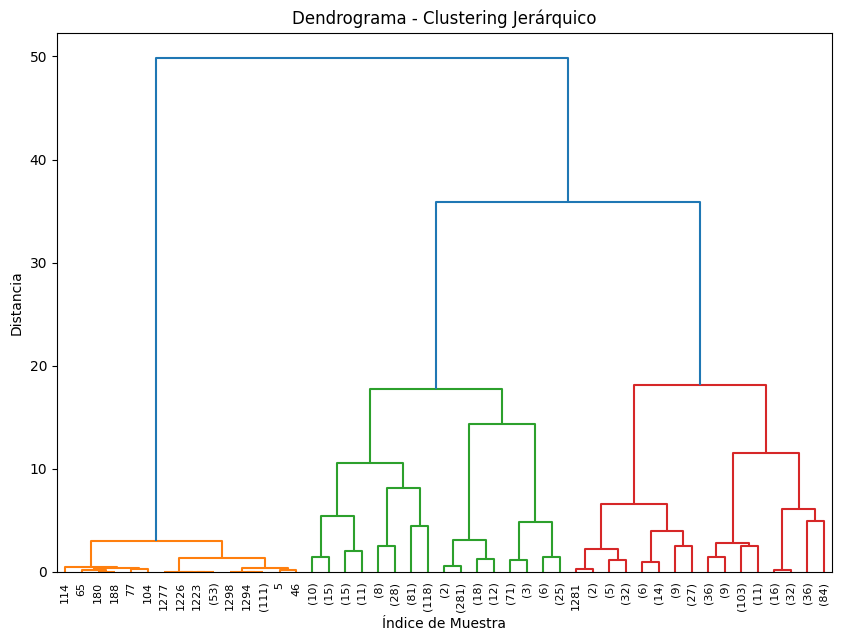

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Linkage y dendrograma
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

# Agregar clusters jerárquicos
df['cluster_hierarchical'] = fcluster(linkage_matrix, 3, criterion='maxclust')


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Variables para el modelo
X = data_numeric  # Variables predictoras
y = df['industry_type_encoded']  # Variable objetivo

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar modelo
y_pred = rf_model.predict(X_test)
print("Evaluación de Random Forest:")
print(classification_report(y_test, y_pred))


Evaluación de Random Forest:
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      1.00      1.00        13
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        11
           8       0.83      1.00      0.91        10
           9       1.00      0.67      0.80         3
          10       1.00      0.92      0.96        26
          11       1.00      1.00      1.00         3
          13       0.60      1.00      0.75         3
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         9
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         2
          19       1.00      0.80      0.89         

C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{met

### Árbol de Decisión

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report

# Entrenar Árbol de Decisión
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluar modelo
y_pred_dt = dt_model.predict(X_test)
print("Evaluación de Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))

# Exportar reglas del árbol
tree_rules = export_text(dt_model, feature_names=numeric_features)
print("\nReglas del Árbol de Decisión:")
print(tree_rules)


Evaluación de Árbol de Decisión:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.28      1.00      0.43        11
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         3
          10       0.48      1.00      0.65        26
          11       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         5
          20       0.96      1.00      0.98     

C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

### Regresión Lineal

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Regresión Lineal
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predicciones
y_pred_lin = lin_model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print("MSE de Regresión Lineal:", mse)
print("R² de Regresión Lineal:", r2)


MSE de Regresión Lineal: 4.058719543366132e-28
R² de Regresión Lineal: 1.0


### Frecuencia de Ciberataques por año e Industria

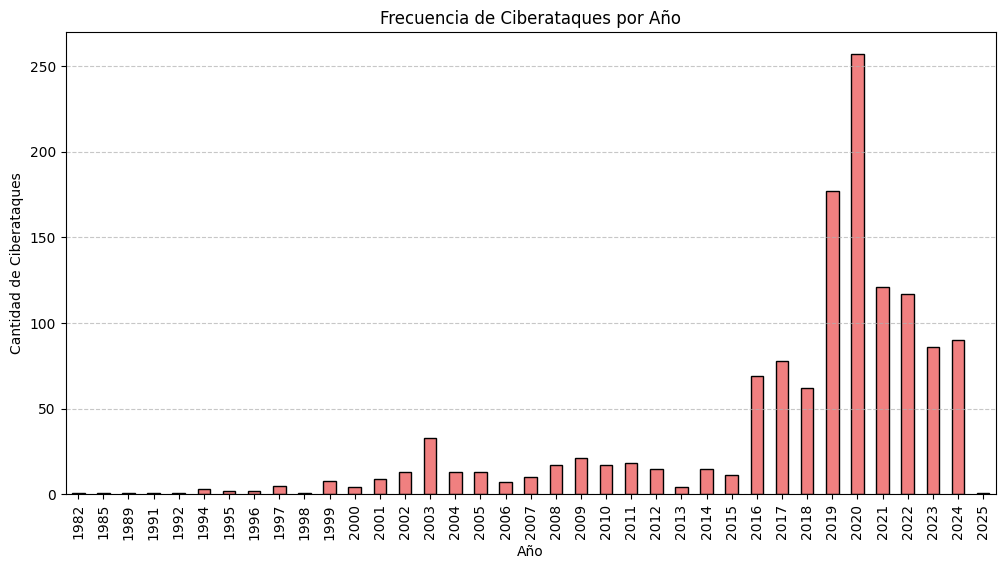


Frecuencia de ciberataques por año:
year
1982      1
1985      1
1989      1
1991      1
1992      1
1994      3
1995      2
1996      2
1997      5
1998      1
1999      8
2000      4
2001      9
2002     13
2003     33
2004     13
2005     13
2006      7
2007     10
2008     17
2009     21
2010     17
2011     18
2012     15
2013      4
2014     15
2015     11
2016     69
2017     78
2018     62
2019    177
2020    257
2021    121
2022    117
2023     86
2024     90
2025      1
Name: count, dtype: int64
Año con mayor número de ataques: 2020
Año con menor número de ataques: 1982


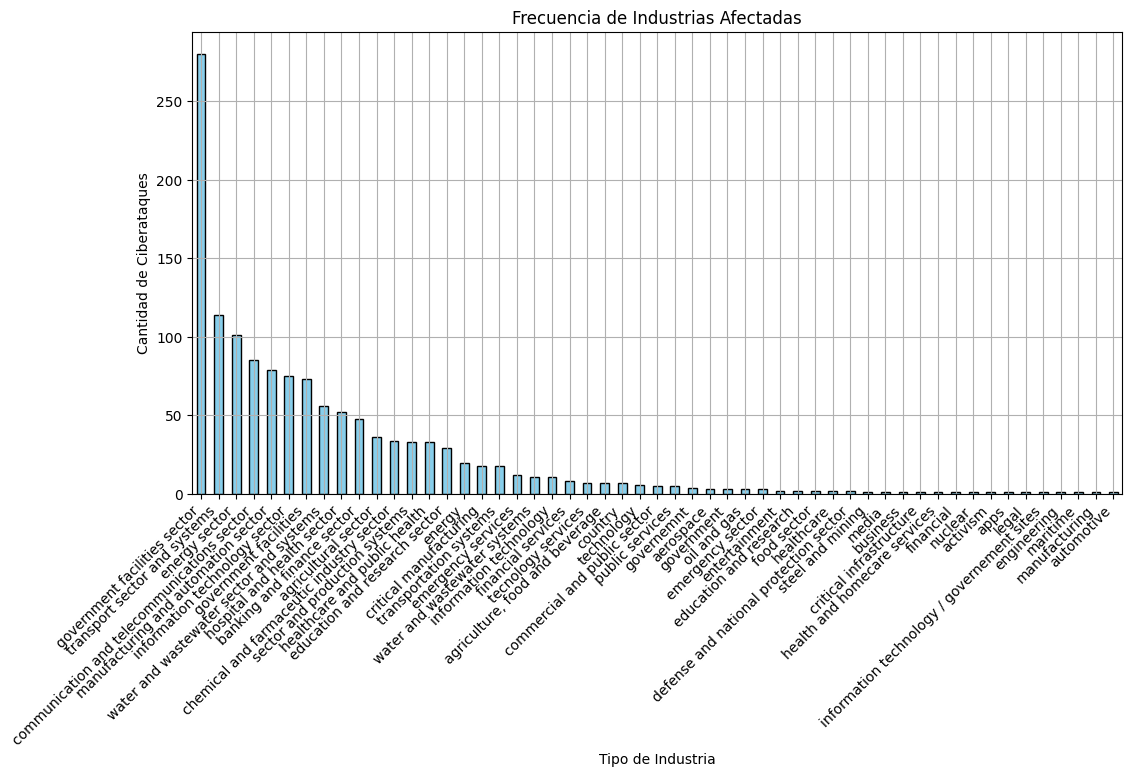


Frecuencia de ataques por industria:
industry_type
government facilities sector                   280
transport sector and systems                   114
energy sector                                  101
communication and telecommunications sector     85
manufacturing and automation sector             79
information technology sector                   75
government facilities                           73
water and wastewater sector and systems         56
hospital and health sector                      52
banking and finance sector                      48
agricultural sector                             36
chemical and farmaceutic industry sector        34
sector and production systems                   33
healthcare and public health                    33
education and research sector                   29
energy                                          20
critical manufacturing                          18
transportation systems                          18
emergency services            

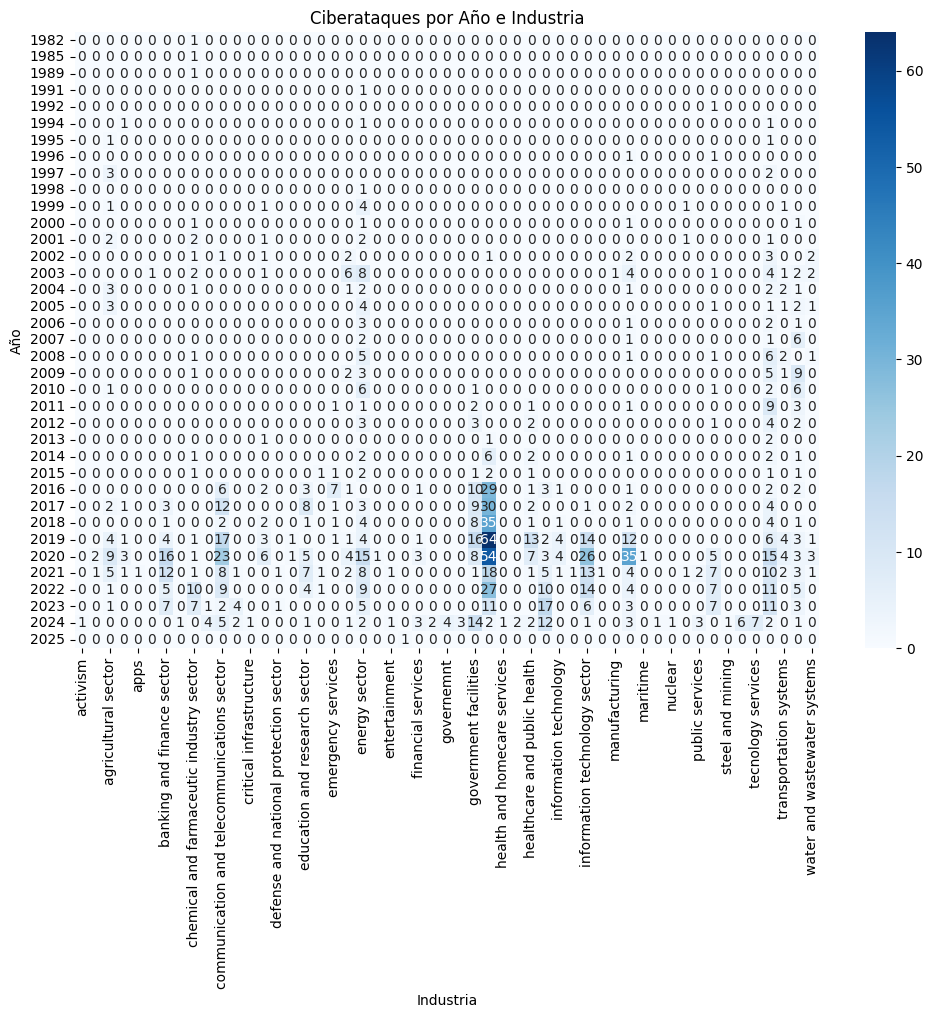


Tabla cruzada entre año e industria:
industry_type  activism  aerospace  agricultural sector  \
year                                                      
1982                  0          0                    0   
1985                  0          0                    0   
1989                  0          0                    0   
1991                  0          0                    0   
1992                  0          0                    0   
1994                  0          0                    0   
1995                  0          0                    1   
1996                  0          0                    0   
1997                  0          0                    3   
1998                  0          0                    0   
1999                  0          0                    1   
2000                  0          0                    0   
2001                  0          0                    2   
2002                  0          0                    0   
2003              

In [24]:
# Verificar si existe la columna 'date' y convertir a datetime si es necesario
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year  # Extraer el año

    # Contar la frecuencia de ataques por año
    attacks_per_year = df['year'].value_counts().sort_index()

    # Graficar la frecuencia de ataques por año
    plt.figure(figsize=(12, 6))
    attacks_per_year.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Frecuencia de Ciberataques por Año')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Ciberataques')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Insight: Verificar tendencia de ataques
    print("\nFrecuencia de ciberataques por año:")
    print(attacks_per_year)
    print("Año con mayor número de ataques:", attacks_per_year.idxmax())
    print("Año con menor número de ataques:", attacks_per_year.idxmin())
else:
    print("La columna 'date' no está disponible en el dataset.")

# Gráfico de frecuencias para los tipos de industrias afectadas
if 'industry_type' in df.columns:
    industry_counts = df['industry_type'].value_counts()

    # Graficar las industrias más afectadas
    plt.figure(figsize=(12, 6))
    industry_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Frecuencia de Industrias Afectadas')
    plt.xlabel('Tipo de Industria')
    plt.ylabel('Cantidad de Ciberataques')
    plt.xticks(rotation=45, ha='right')
    plt.grid()
    plt.show()

    # Insight: Analizar las industrias más afectadas
    print("\nFrecuencia de ataques por industria:")
    print(industry_counts)
    print("Industria más afectada:", industry_counts.idxmax())
    print("Industria menos afectada:", industry_counts.idxmin())
else:
    print("La columna 'industry_type' no está disponible en el dataset.")

# Análisis cruzado entre 'year' e 'industry_type'
if 'year' in df.columns and 'industry_type' in df.columns:
    cross_tab = pd.crosstab(df['year'], df['industry_type'])

    # Heatmap para visualizar el cruce
    plt.figure(figsize=(12, 8))
    sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d', cbar=True)
    plt.title('Ciberataques por Año e Industria')
    plt.xlabel('Industria')
    plt.ylabel('Año')
    plt.show()

    # Insight: Identificar combinaciones de año e industria con más ataques
    print("\nTabla cruzada entre año e industria:")
    print(cross_tab)
    print("Año e industria con mayor número de ataques:")
    max_attacks = cross_tab.stack().idxmax()
    print(f"Año: {max_attacks[0]}, Industria: {max_attacks[1]}")
else:
    print("Las columnas 'year' e 'industry_type' no están disponibles en el dataset.")


### FRECUENCIA DE CIBERATAQUES POR MES/AÑO

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_16464\1548437713.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


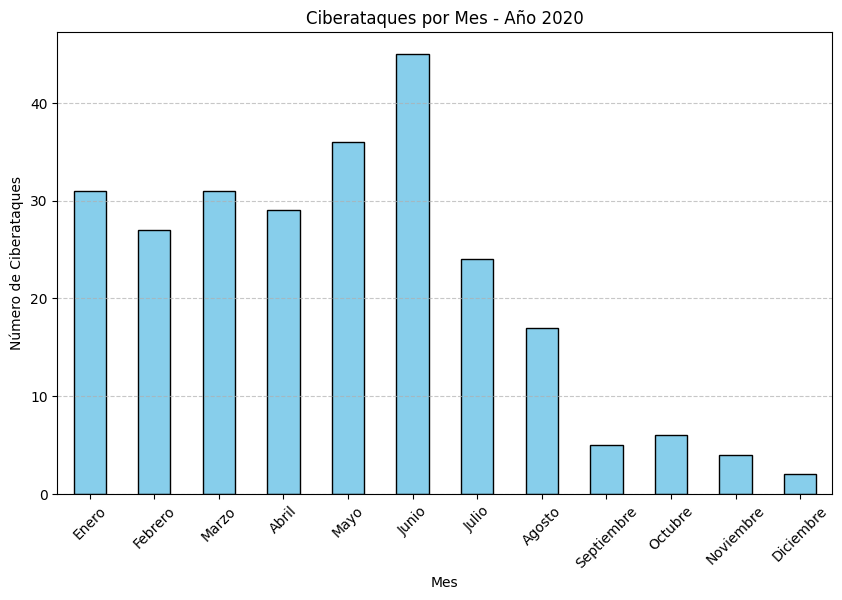

Insights para el año 2020:
- Total de ciberataques registrados: 257
- Mes con mayor número de ataques: 6 (45 ataques)
- Mes con menor número de ataques: 12 (2 ataques)




C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_16464\1548437713.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


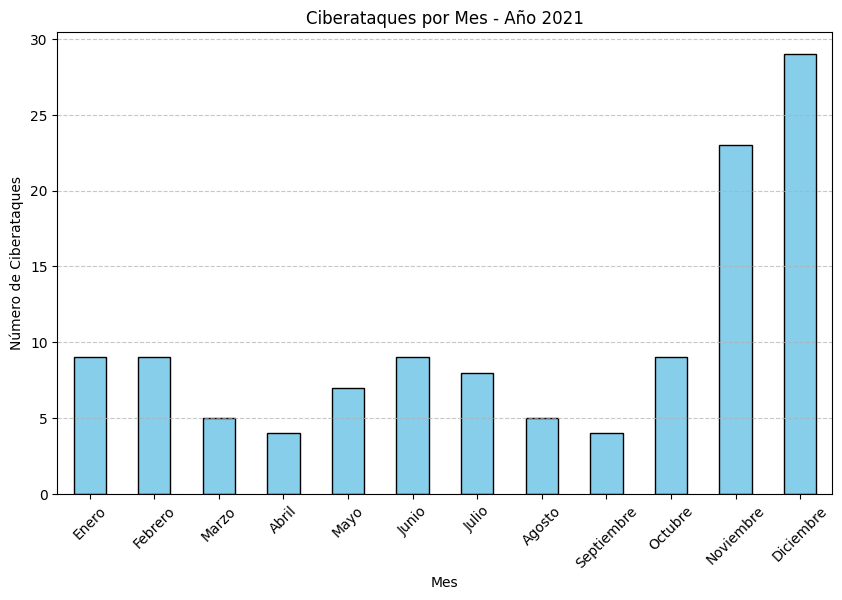

Insights para el año 2021:
- Total de ciberataques registrados: 121
- Mes con mayor número de ataques: 12 (29 ataques)
- Mes con menor número de ataques: 4 (4 ataques)




C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_16464\1548437713.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


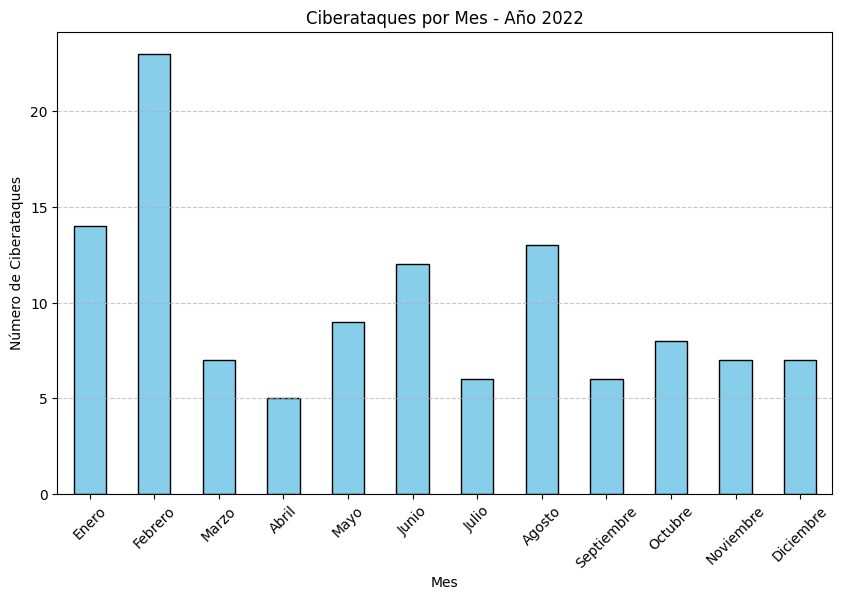

Insights para el año 2022:
- Total de ciberataques registrados: 117
- Mes con mayor número de ataques: 2 (23 ataques)
- Mes con menor número de ataques: 4 (5 ataques)




C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_16464\1548437713.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


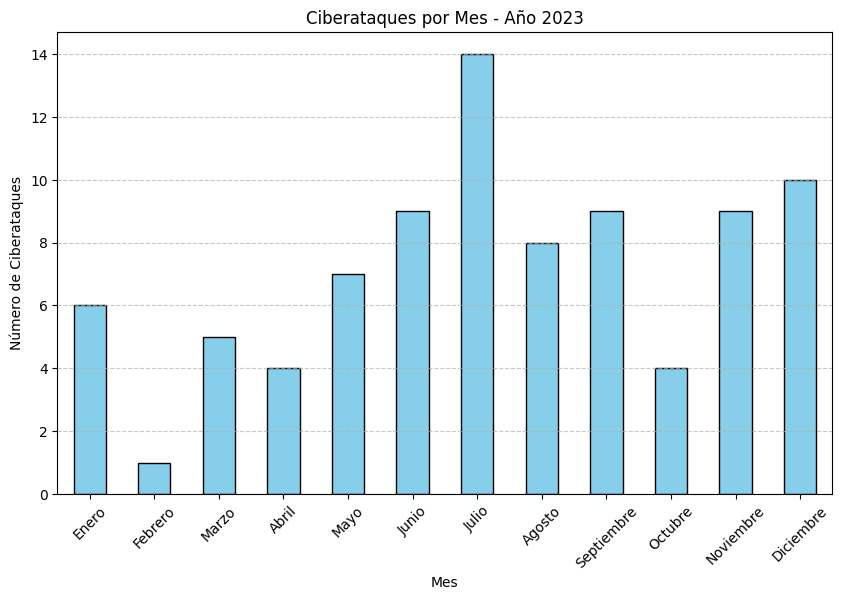

Insights para el año 2023:
- Total de ciberataques registrados: 86
- Mes con mayor número de ataques: 7 (14 ataques)
- Mes con menor número de ataques: 2 (1 ataques)




C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_16464\1548437713.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['date'].dt.month


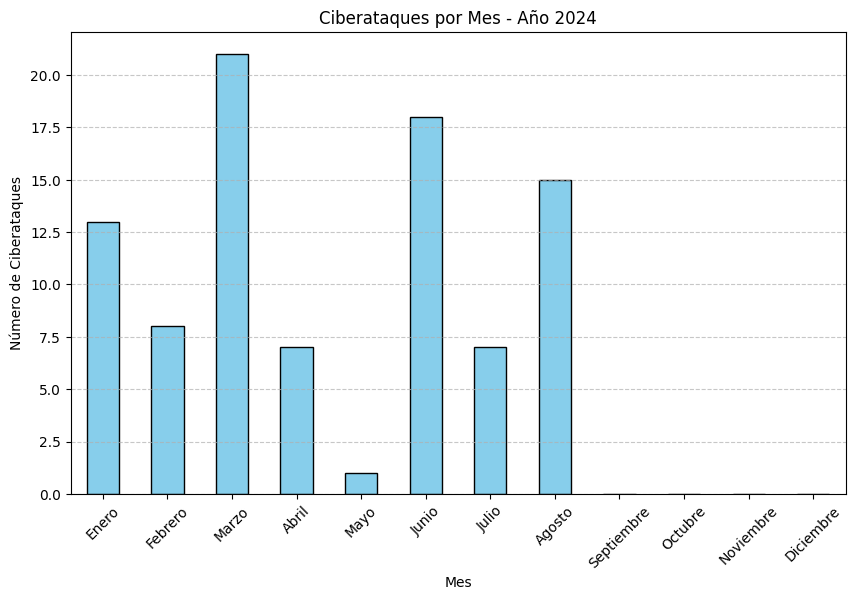

Insights para el año 2024:
- Total de ciberataques registrados: 90
- Mes con mayor número de ataques: 3 (21 ataques)
- Mes con menor número de ataques: 9 (0 ataques)




In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que la columna 'date' sea de tipo datetime
if 'date' in df.columns:
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Filtrar los datos por año
    years_to_plot = [2020, 2021, 2022, 2023, 2024]

    # Iterar sobre los años y generar un gráfico por cada uno
    for year in years_to_plot:
        # Filtrar los ciberataques para el año actual
        data_filtered = df[df['date'].dt.year == year]
        
        if not data_filtered.empty:  # Verificar si hay datos para el año actual
            # Contar los ciberataques por mes
            data_filtered['month'] = data_filtered['date'].dt.month
            monthly_counts = data_filtered['month'].value_counts().reindex(range(1, 13), fill_value=0)

            # Crear el gráfico
            plt.figure(figsize=(10, 6))
            monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title(f'Ciberataques por Mes - Año {year}')
            plt.xlabel('Mes')
            plt.ylabel('Número de Ciberataques')
            plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

            # Insights
            print(f"Insights para el año {year}:")
            print(f"- Total de ciberataques registrados: {monthly_counts.sum()}")
            print(f"- Mes con mayor número de ataques: {monthly_counts.idxmax()} ({monthly_counts.max()} ataques)")
            print(f"- Mes con menor número de ataques: {monthly_counts.idxmin()} ({monthly_counts.min()} ataques)")
            print("\n")
        else:
            print(f"No se encontraron ciberataques para el año {year}.")
else:
    print("La columna 'date' no está disponible en el dataset.")


### Ataques por País y Año

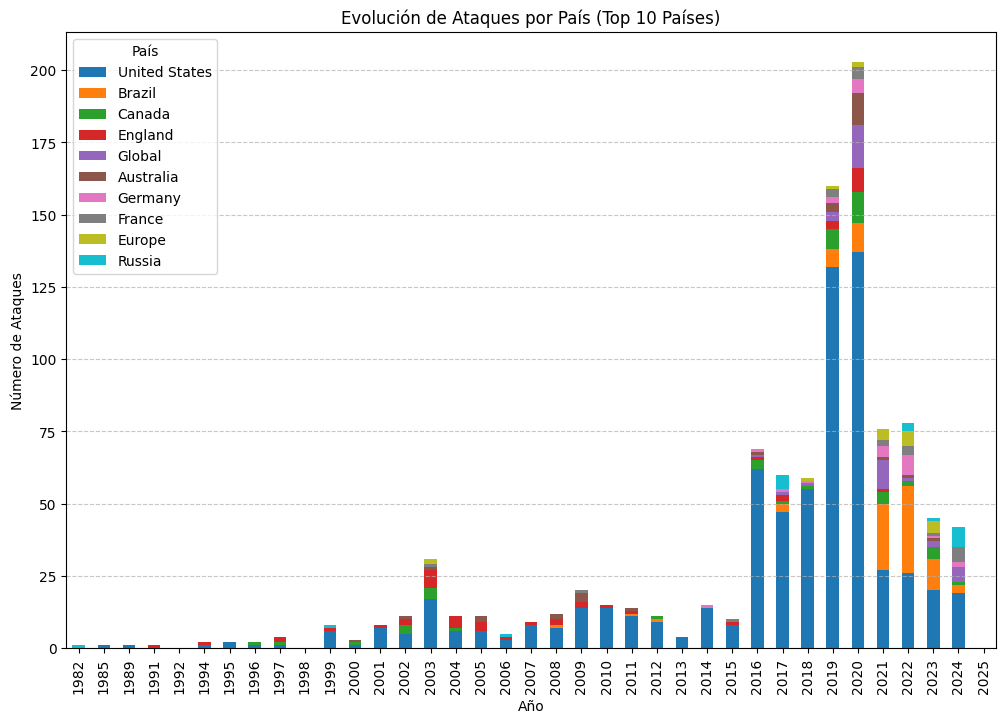

Insights:
- Países más afectados en el período analizado: United States, Brazil, Canada, England, Global, Australia, Germany, France, Europe, Russia


In [26]:
# Verificar que las columnas 'date' y 'country' estén disponibles
if 'date' in df.columns and 'country' in df.columns:
    df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year  # Extraer el año
    country_year_pivot = pd.crosstab(df['year'], df['country'])

    # Mostrar los 10 países más afectados
    top_countries = country_year_pivot.sum(axis=0).sort_values(ascending=False).head(10).index
    country_year_pivot[top_countries].plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')
    plt.title('Evolución de Ataques por País (Top 10 Países)')
    plt.xlabel('Año')
    plt.ylabel('Número de Ataques')
    plt.legend(title='País')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Insight
    print("Insights:")
    print(f"- Países más afectados en el período analizado: {', '.join(top_countries)}")
else:
    print("Las columnas 'date' y/o 'country' no están disponibles en el dataset.")


### Relación entre Tipos de Industria y Subcategorías

<Figure size 1400x800 with 0 Axes>

) missing from font(s) DejaVu Sans.ming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


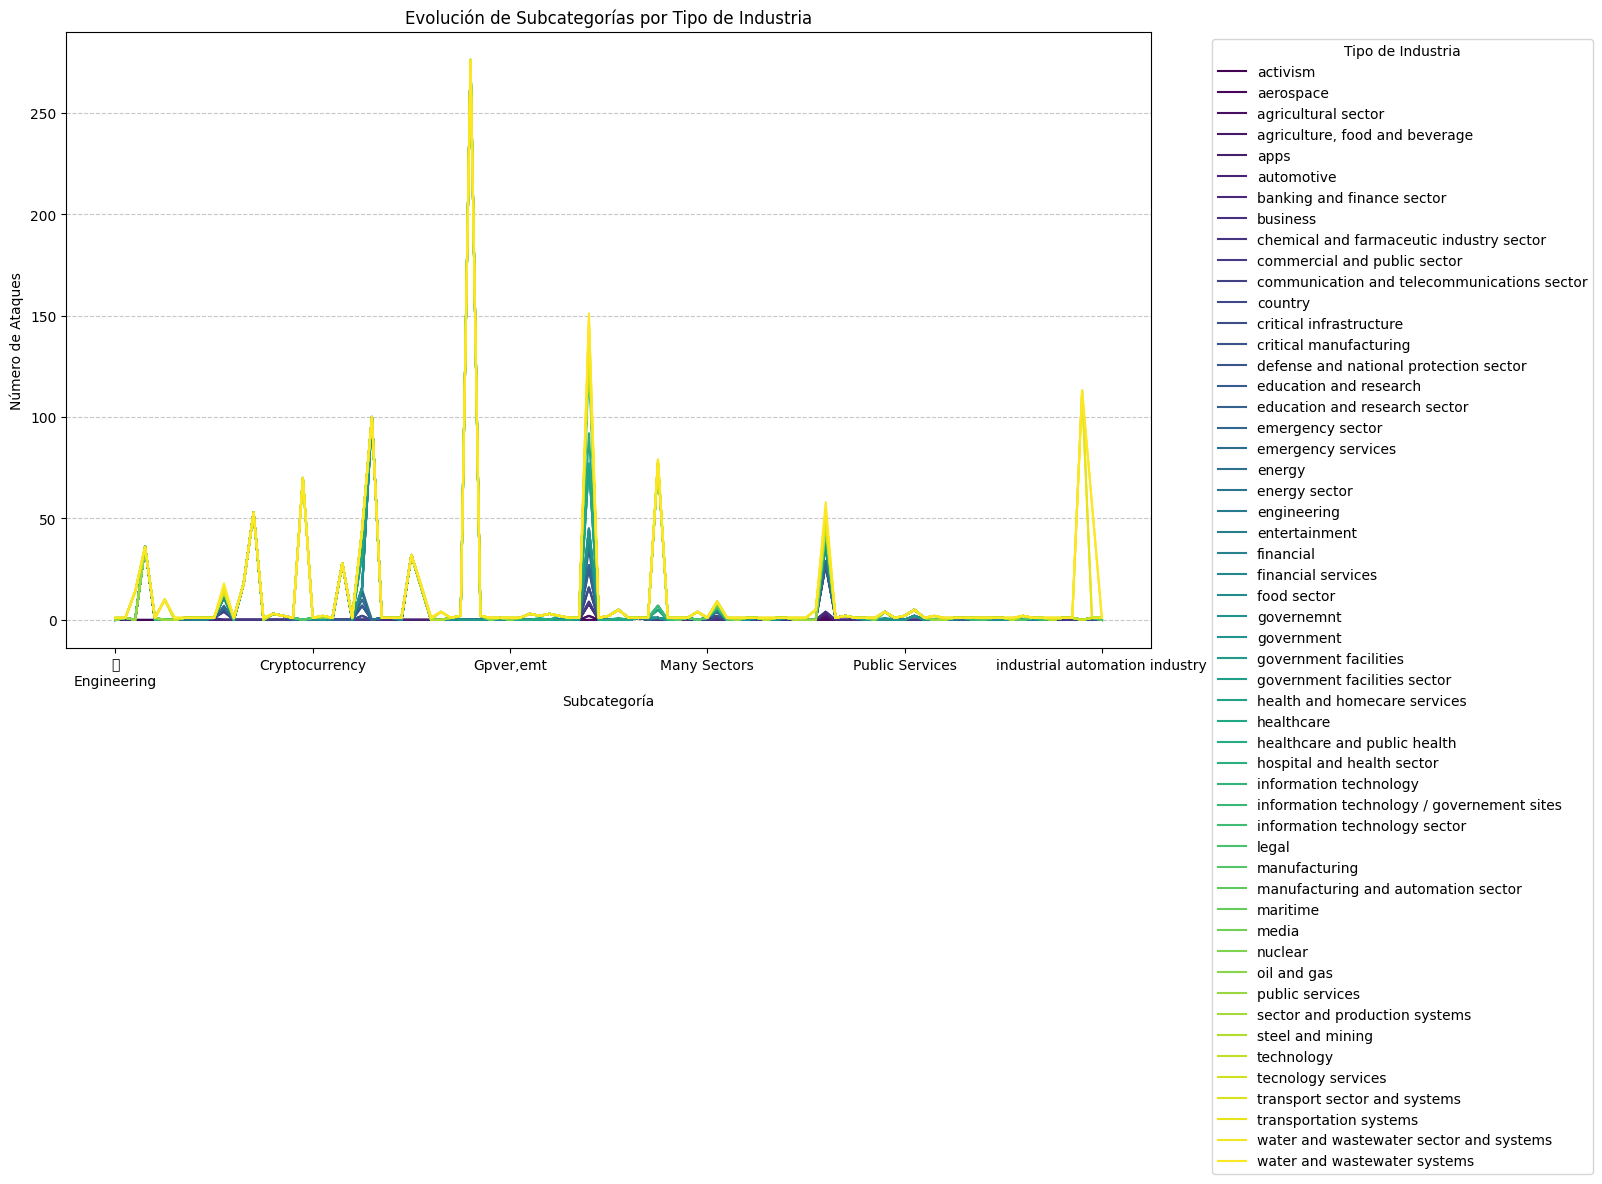

In [ ]:
import seaborn as sns

# Crear un dataset simplificado para el gráfico de burbujas
bubble_data = df.groupby(['industry_type', 'subcategory']).size().reset_index(name='count')

# Crear el gráfico de burbujas
plt.figure(figsize=(14, 8))
sns.scatterplot(data=bubble_data, x='industry_type', y='subcategory', size='count', sizes=(50, 500), alpha=0.7, legend=False)
plt.title('Distribución de Subcategorías por Tipo de Industria (Gráfico de Burbujas)')
plt.xlabel('Tipo de Industria')
plt.ylabel('Subcategoría')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


### Días con Mayor Número de Ataques

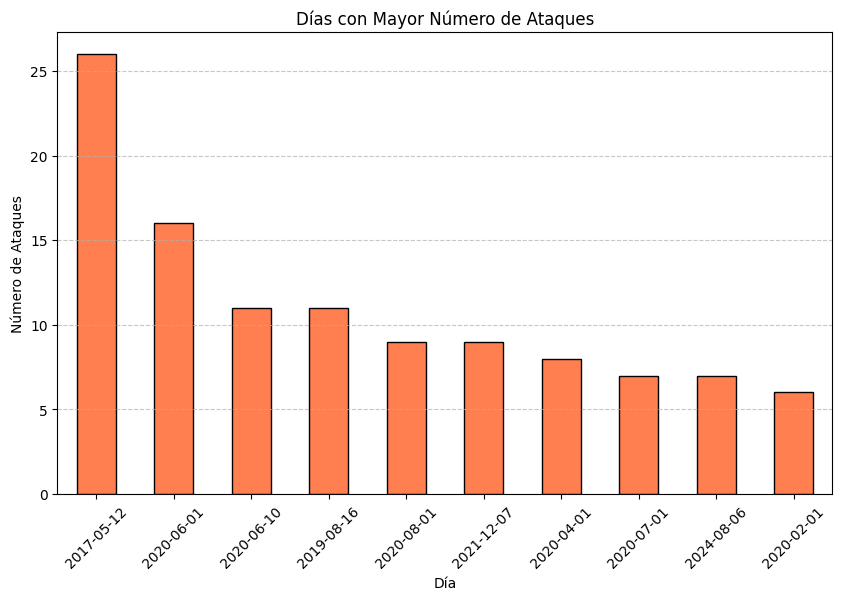

Insights:
- Días más afectados por ciberataques: 2017-05-12, 2020-06-01, 2020-06-10, 2019-08-16, 2020-08-01, 2021-12-07, 2020-04-01, 2020-07-01, 2024-08-06, 2020-02-01
- Se recomienda investigar qué eventos ocurrieron en esos días.


In [28]:
if 'date' in df.columns:
    df['day'] = pd.to_datetime(df['date'], errors='coerce').dt.date  # Extraer solo la fecha (sin hora)
    attacks_per_day = df['day'].value_counts().sort_values(ascending=False).head(10)

    # Gráfico de los días con más ataques
    attacks_per_day.plot(kind='bar', color='coral', figsize=(10, 6), edgecolor='black')
    plt.title('Días con Mayor Número de Ataques')
    plt.xlabel('Día')
    plt.ylabel('Número de Ataques')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Insight
    print("Insights:")
    print(f"- Días más afectados por ciberataques: {', '.join(attacks_per_day.index.astype(str))}")
    print("- Se recomienda investigar qué eventos ocurrieron en esos días.")
else:
    print("La columna 'date' no está disponible en el dataset.")


### Tiempo Promedio entre Ataques

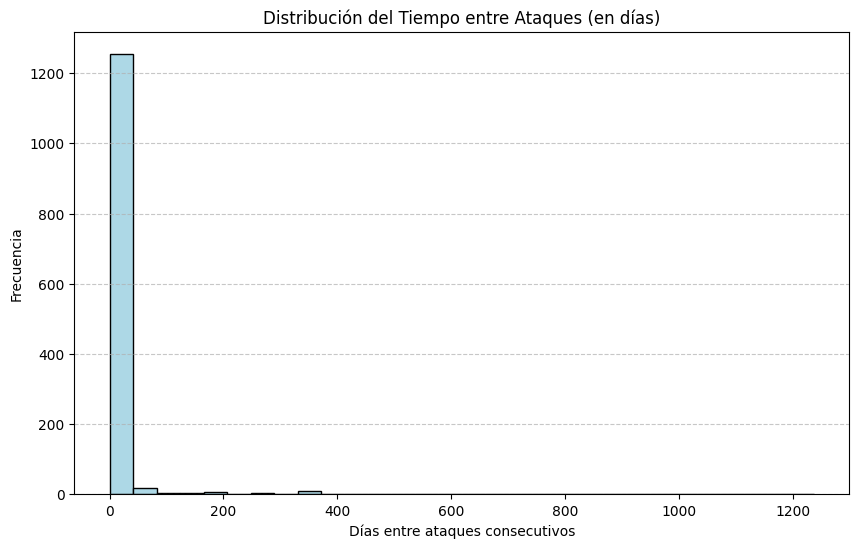

Insights:
- Tiempo promedio entre ataques: 12.00 días.
- Tiempo mediano entre ataques: 1.00 días.


In [29]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.sort_values('date')
    time_deltas = df['date'].diff().dropna()

    avg_time_between_attacks = time_deltas.mean()
    median_time_between_attacks = time_deltas.median()

    # Histograma del tiempo entre ataques
    time_deltas_in_days = time_deltas.dt.days
    plt.figure(figsize=(10, 6))
    plt.hist(time_deltas_in_days, bins=30, color='lightblue', edgecolor='black')
    plt.title('Distribución del Tiempo entre Ataques (en días)')
    plt.xlabel('Días entre ataques consecutivos')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Insight
    print("Insights:")
    print(f"- Tiempo promedio entre ataques: {avg_time_between_attacks.days:.2f} días.")
    print(f"- Tiempo mediano entre ataques: {median_time_between_attacks.days:.2f} días.")
else:
    print("La columna 'date' no está disponible en el dataset.")


### Tendencias Temporales por Subcategoría

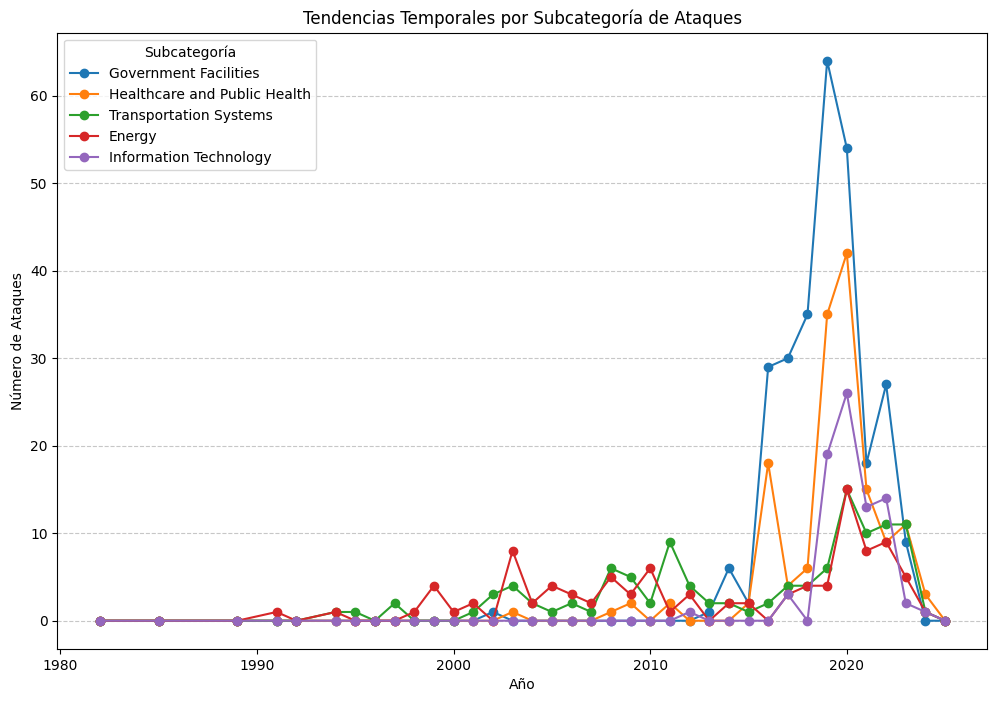

Insights:
- Subcategorías más comunes: Government Facilities, Healthcare and Public Health, Transportation Systems, Energy, Information Technology
- Observa si ciertas amenazas están en aumento o disminución con el tiempo.


In [30]:
if 'date' in df.columns and 'subcategory' in df.columns:
    df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year  # Extraer el año
    subcategory_year_pivot = pd.crosstab(df['year'], df['subcategory'])

    # Mostrar las 5 subcategorías más comunes
    top_subcategories = subcategory_year_pivot.sum(axis=0).sort_values(ascending=False).head(5).index
    subcategory_year_pivot[top_subcategories].plot(kind='line', figsize=(12, 8), marker='o')
    plt.title('Tendencias Temporales por Subcategoría de Ataques')
    plt.xlabel('Año')
    plt.ylabel('Número de Ataques')
    plt.legend(title='Subcategoría')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Insight
    print("Insights:")
    print(f"- Subcategorías más comunes: {', '.join(top_subcategories)}")
    print("- Observa si ciertas amenazas están en aumento o disminución con el tiempo.")
else:
    print("Las columnas 'date' y/o 'subcategory' no están disponibles en el dataset.")
